In [1]:
import warnings
warnings.filterwarnings('ignore')

## Research Questions

**1**. Can we predict whether a customer will churn based on their service usage, tenure,  
and demographics?  
**2**. Which features contribute the most to predicting churn?  
**3**. Can the model detect at-risk customers early (e.g., within the first 3 months)?  
**4**. Can we segment customers by churn risk probability to prioritize retention campaigns?  
**5**. Can we predict churn differently for different customer segments, such as geography or senior citizens or acitivity status?

## Loading 

In [2]:
import pandas as pd
import numpy as np


In [3]:
df_og=pd.read_csv('Churn Dataset.csv')


## Features info

**Customer ID:** A unique identifier for each customer  
**Surname:** The customer's surname or last name  
**Credit Score:** A numerical value representing the customer's credit score  
**Geography:** The country where the customer resides (France, Spain or Germany)  
**Gender:** The customer's gender (Male or Female)  
**Age:** The customer's age.  
**Tenure:** The number of years the customer has been with the bank  
**Balance:** The customer's account balance  
**NumOfProducts:** The number of bank products the customer uses (e.g., savings account, credit card)  
**HasCrCard:** Whether the customer has a credit card (1 = yes, 0 = no)  
**IsActiveMember:** Whether the customer is an active member (1 = yes, 0 = no)  
**EstimatedSalary:** The estimated salary of the customer  
**Exited:** Whether the customer has churned (1 = yes, 0 = no)

## Data Cleaning and Preprocessing

In [4]:
df_og=pd.DataFrame(df_og)

In [5]:
df_og.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df_og

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,No
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,Yes,No,96270.64,No
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,Yes,Yes,101699.77,No
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,No,Yes,42085.58,Yes
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,Yes,No,92888.52,Yes


In [7]:
df_og.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memory usage: 1.1+ MB


In [9]:
df_og.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [10]:
df_og

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
3,699,France,Female,39,1,0.00,2,No,No,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,Yes,No,96270.64,No
9996,516,France,Male,35,10,57369.61,1,Yes,Yes,101699.77,No
9997,709,France,Female,36,7,0.00,1,No,Yes,42085.58,Yes
9998,772,Germany,Male,42,3,75075.31,2,Yes,No,92888.52,Yes


In [11]:
df_og['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
df_og.rename(columns={'Exited': 'Churn'}, inplace=True)


In [13]:
df_og['Churn']=df_og['Churn'].map({"Yes":1,"No":0})


In [14]:
df_og['HasCrCard']=df_og['HasCrCard'].map({"Yes":1,"No":0})


In [15]:
df_og['IsActiveMember']=df_og['IsActiveMember'].map({"Yes":1,"No":0})


In [16]:
df_og['Gender']=df_og['Gender'].map({"Male":1,"Female":0})


In [17]:
df_og

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [18]:
df=pd.get_dummies(df_og,columns=['Geography'])

In [19]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,709,0,36,7,0.00,1,0,1,42085.58,1,True,False,False
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,False,True,False


In [20]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,709,0,36,7,0.00,1,0,1,42085.58,1,True,False,False
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,False,True,False


## df_og

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Churn              10000 non-null  int64  
 10  Geography_France   10000 non-null  bool   
 11  Geography_Germany  10000 non-null  bool   
 12  Geography_Spain    10000 non-null  bool   
dtypes: bool(3), float64(2), int64(8)
memory usage: 810.7 KB


In [22]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,709,0,36,7,0.00,1,0,1,42085.58,1,True,False,False
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,False,True,False


In [23]:
df=df[[col for col in df.columns if col != 'Churn'] + ['Churn']]

In [24]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Churn
0,619,0,42,2,0.00,1,1,1,101348.88,True,False,False,1
1,608,0,41,1,83807.86,1,0,1,112542.58,False,False,True,0
2,502,0,42,8,159660.80,3,1,0,113931.57,True,False,False,1
3,699,0,39,1,0.00,2,0,0,93826.63,True,False,False,0
4,850,0,43,2,125510.82,1,1,1,79084.10,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,True,False,False,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,True,False,False,0
9997,709,0,36,7,0.00,1,0,1,42085.58,True,False,False,1
9998,772,1,42,3,75075.31,2,1,0,92888.52,False,True,False,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Geography_France   10000 non-null  bool   
 10  Geography_Germany  10000 non-null  bool   
 11  Geography_Spain    10000 non-null  bool   
 12  Churn              10000 non-null  int64  
dtypes: bool(3), float64(2), int64(8)
memory usage: 810.7 KB


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Geography_France   10000 non-null  bool   
 10  Geography_Germany  10000 non-null  bool   
 11  Geography_Spain    10000 non-null  bool   
 12  Churn              10000 non-null  int64  
dtypes: bool(3), float64(2), int64(8)
memory usage: 810.7 KB


## EDA

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df['Churn'].value_counts(normalize=1)

Churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Churn Distribution')

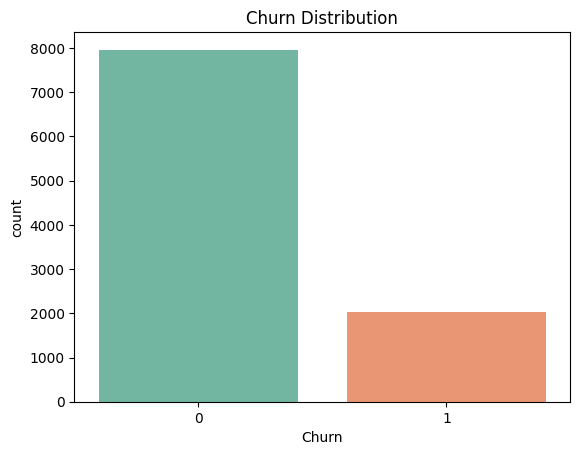

In [29]:
sns.countplot(x='Churn',data=df,palette='Set2')
plt.title("Churn Distribution")


Observation from the Countplot graph:
Churn count ratio is almost 80-20

In [30]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Churn'],
      dtype='object')

Text(0, 0.5, 'Count')

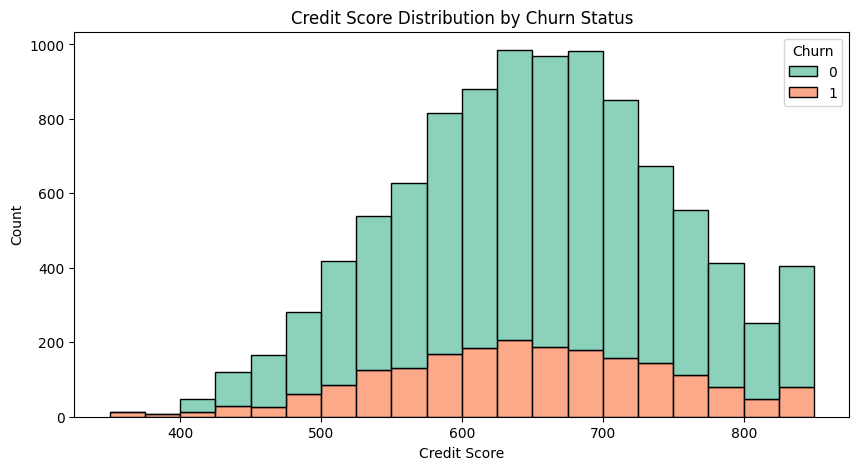

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='CreditScore',hue='Churn',bins=20,multiple='stack',palette='Set2')
plt.title('Credit Score Distribution by Churn Status')
plt.xlabel('Credit Score')
plt.ylabel('Count')


Observation from the graph:
Range600-700 has highest number of customers
Churn is fairly spread(difference ratio between orange and blue bars), hence credit score alone isn't a stronger prediction

Text(0, 0.5, 'Age')

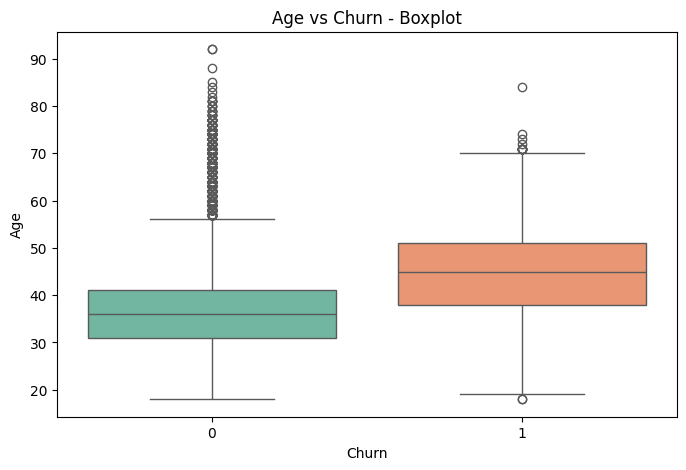

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='Age',palette='Set2')
plt.title("Age vs Churn - Boxplot")
plt.xlabel("Churn")
plt.ylabel("Age")

Observation: Churners are older than non churners but there exists outliers in non churners
also churners have wider age spread

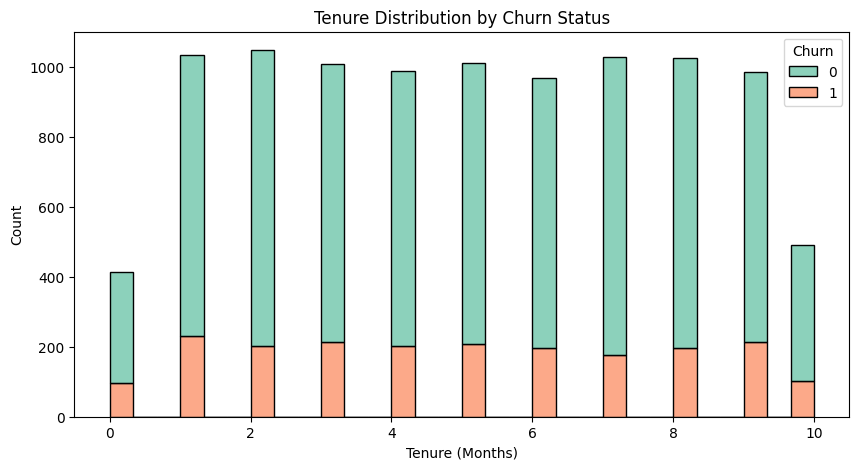

In [33]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Tenure', hue='Churn', bins=30, palette='Set2', multiple='stack')
plt.title("Tenure Distribution by Churn Status")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.show()

Observations: Newer customer are more likely to churn

Text(0, 0.5, 'Count')

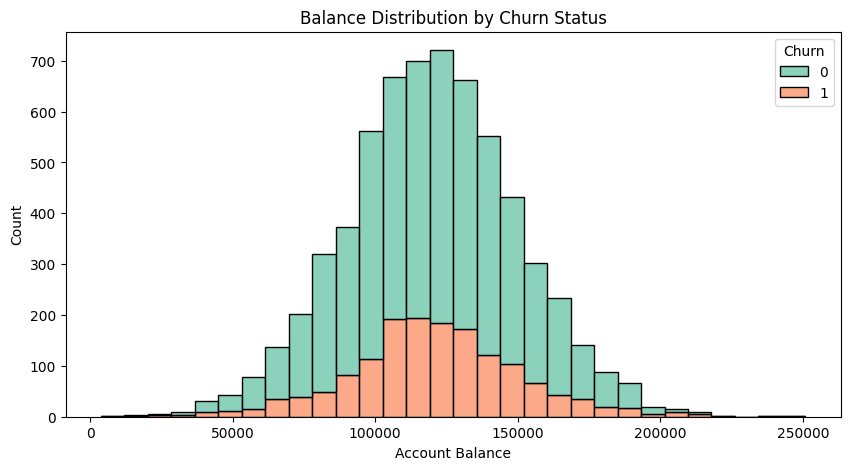

In [34]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_og[df_og['Balance'] > 0], x='Balance', hue='Churn',
             bins=30, palette='Set2',multiple='stack')
plt.title("Balance Distribution by Churn Status")
plt.xlabel("Account Balance")
plt.ylabel("Count")

Observations: Both churned and non-churned customers span across all balance ranges.
As the balance increases above 140k, the number of churners decrease drastically

Text(0, 0.5, 'Count')

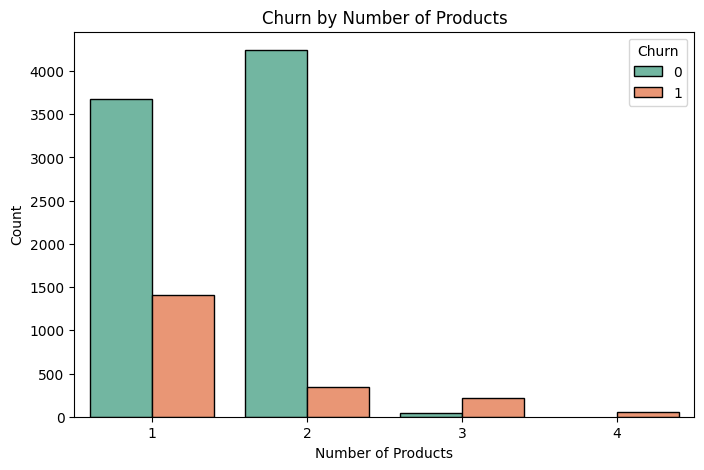

In [35]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='NumOfProducts', hue='Churn', palette='Set2',edgecolor='black')
plt.title("Churn by Number of Products")
plt.xlabel("Number of Products")
plt.ylabel("Count")

Observations: Churn is higher for customer with 1 product
For 2 products, churn rate decreases, maybe due to more satisfied users
Very few people have 3 or 4 products, so it's hard to draw a reliable pattern here.

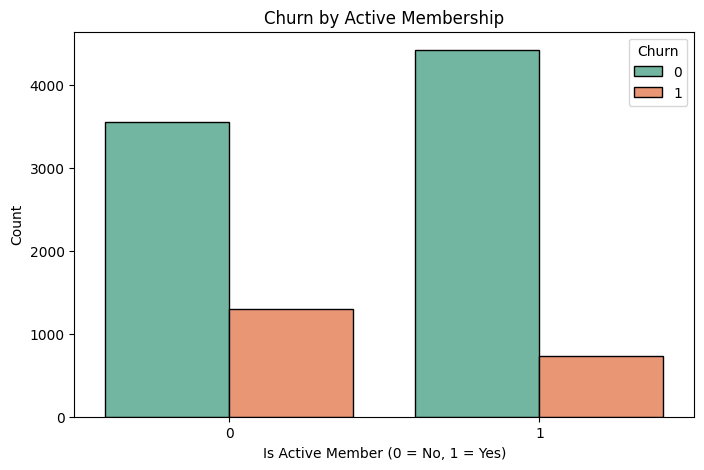

In [36]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='IsActiveMember', hue='Churn', palette='Set2', edgecolor='black')
plt.title("Churn by Active Membership")
plt.xlabel("Is Active Member (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


Observation: Inactive member have more churn ratio than active member as for active member, majority didn't churn

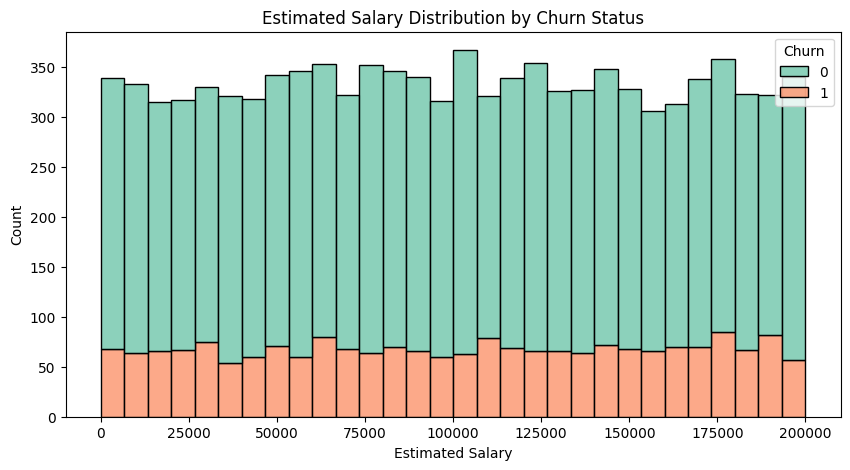

In [37]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='EstimatedSalary', hue='Churn', bins=30,
             palette='Set2', multiple='stack', edgecolor='black')
plt.title("Estimated Salary Distribution by Churn Status")
plt.xlabel("Estimated Salary")
plt.ylabel("Count")
plt.show()


Observation: The distribution is nearly uniform, hence EstimatedSalary is not a strong predictor of churn.

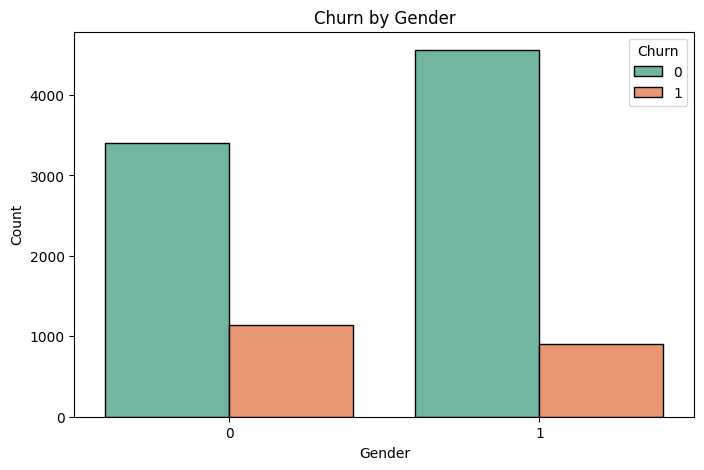

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender', hue='Churn', palette='Set2', edgecolor='black')
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


Observation: Churn ratio of Male is less than that of female

Text(0, 0.5, 'Count')

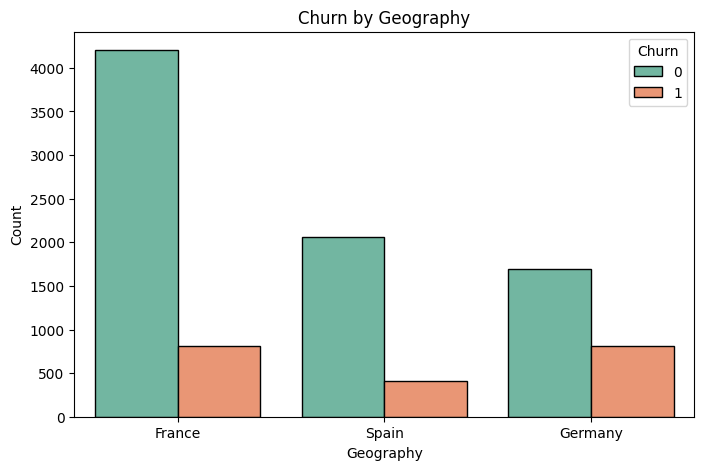

In [39]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_og, x='Geography', hue='Churn', palette='Set2', edgecolor='black')
plt.title("Churn by Geography")
plt.xlabel("Geography")
plt.ylabel("Count")

Observation: Customer of Germany churn more and french customer has very less churn ratio

## Correlation heatmap

In [40]:
corr_matrix=df.corr()

In [41]:
corr_matrix

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Churn
CreditScore,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.008928,0.005538,0.004780,-0.027094
Gender,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,0.006772,-0.024628,0.016889,-0.106512
Age,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,-0.039208,0.046897,-0.001685,0.285323
Tenure,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.002848,-0.000567,0.003868,-0.014001
Balance,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,-0.231329,0.401110,-0.134892,0.118533
NumOfProducts,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,0.001230,-0.010419,0.009039,-0.047820
HasCrCard,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,0.002467,0.010577,-0.013480,-0.007138
IsActiveMember,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,0.003317,-0.020486,0.016732,-0.156128
EstimatedSalary,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,-0.003332,0.010297,-0.006482,0.012097
Geography_France,-0.008928,0.006772,-0.039208,-0.002848,-0.231329,0.001230,0.002467,0.003317,-0.003332,1.000000,-0.580359,-0.575418,-0.104955


Text(0.5, 1.0, 'Correlation Heatmap')

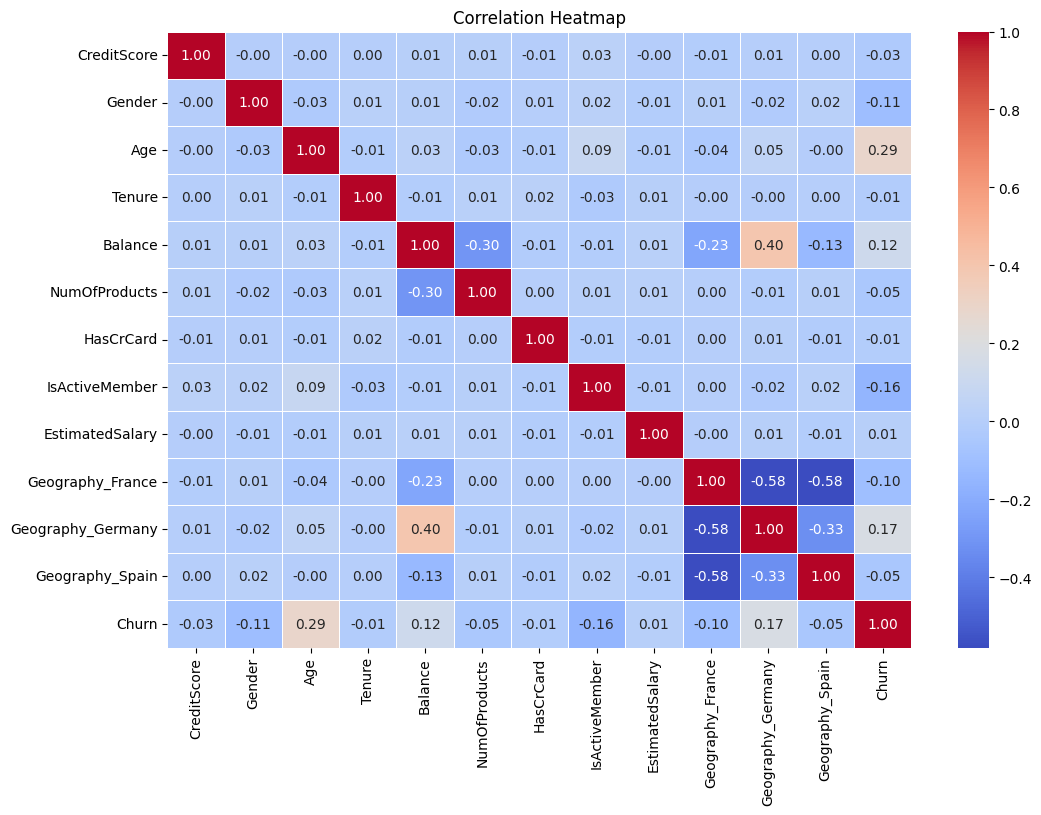

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidths=0.5,fmt='.2f')
plt.title("Correlation Heatmap")

## Train Test Split

In [43]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Churn
0,619,0,42,2,0.00,1,1,1,101348.88,True,False,False,1
1,608,0,41,1,83807.86,1,0,1,112542.58,False,False,True,0
2,502,0,42,8,159660.80,3,1,0,113931.57,True,False,False,1
3,699,0,39,1,0.00,2,0,0,93826.63,True,False,False,0
4,850,0,43,2,125510.82,1,1,1,79084.10,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,True,False,False,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,True,False,False,0
9997,709,0,36,7,0.00,1,0,1,42085.58,True,False,False,1
9998,772,1,42,3,75075.31,2,1,0,92888.52,False,True,False,1


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [45]:
X=df.iloc[:,:-1]
y=df['Churn']

In [46]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,False,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,True,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,True,False,False
9996,516,1,35,10,57369.61,1,1,1,101699.77,True,False,False
9997,709,0,36,7,0.00,1,0,1,42085.58,True,False,False
9998,772,1,42,3,75075.31,2,1,0,92888.52,False,True,False


In [47]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Churn, Length: 10000, dtype: int64

In [48]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler=StandardScaler()

In [51]:
smote=SMOTE(random_state=42)

In [52]:
X_res,y_res=smote.fit_resample(X,y)

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42,stratify=y_res)

In [54]:
X_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
915,596,1,47,6,0.000000,1,1,0,74835.650000,True,False,False
2987,676,0,26,1,108348.660000,1,0,0,60231.740000,False,True,False
3666,701,0,21,9,0.000000,2,1,1,26327.420000,False,False,True
6336,536,0,35,4,121520.360000,1,0,0,77178.420000,False,True,False
14282,522,0,43,3,0.000000,1,0,0,146268.454161,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
5952,590,1,29,10,0.000000,1,1,1,51907.720000,False,False,True
9263,542,0,31,3,0.000000,2,1,1,115217.590000,True,False,False
3046,658,0,31,3,133003.030000,1,0,1,146339.270000,False,True,False
11684,606,0,46,3,111429.723521,1,0,0,11534.999457,False,True,True


In [55]:
X_train_scaler=scaler.fit_transform(X_train)
X_test_scaler=scaler.transform(X_test)

In [56]:
X_train_scaler

array([[-0.57772735,  1.20006065,  0.60043351, ...,  0.93050874,
        -0.75429803, -0.63513213],
       [ 0.2944276 , -0.83329122, -1.49759805, ..., -1.07468093,
         1.32573593, -0.63513213],
       [ 0.56697602, -0.83329122, -1.99712937, ..., -1.07468093,
        -0.75429803,  1.57447554],
       ...,
       [ 0.09819274, -0.83329122, -0.99806672, ..., -1.07468093,
         1.32573593, -0.63513213],
       [-0.46870798, -0.83329122,  0.50052725, ..., -1.07468093,
         1.32573593,  1.57447554],
       [ 0.02187918,  1.20006065, -0.69834793, ...,  0.93050874,
        -0.75429803, -0.63513213]], shape=(12740, 12))

## Logistic Regression

In [57]:
model=LogisticRegression()

In [58]:
model.fit(X_train_scaler,y_train)

LogisticRegression()

In [59]:
y_pred=model.predict(X_test_scaler)

In [60]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.80      0.82      1712
           1       0.78      0.84      0.81      1474

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186



In [61]:
accuracy_score(y_pred,y_test)

0.8182674199623352

## KNN Model

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn_model=KNeighborsClassifier()

In [64]:
param={
    'n_neighbors':[3,5,7,10,15],
    'weights': ['uniform', 'distance']
}

In [65]:
gridcv=GridSearchCV(
    estimator=knn_model,
    cv=5,
    param_grid=param,
    scoring='precision',
    n_jobs=-1,
    verbose=1
)

In [66]:
gridcv.fit(X_train_scaler,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 10, 15],
                         'weights': ['uniform', 'distance']},
             scoring='precision', verbose=1)

In [67]:
gridcv.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [68]:
y_pred=gridcv.predict(X_test_scaler)

In [69]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1761
           1       0.79      0.88      0.83      1425

    accuracy                           0.84      3186
   macro avg       0.84      0.85      0.84      3186
weighted avg       0.85      0.84      0.84      3186



## SVM Model

In [70]:
# from sklearn.svm import SVC

In [71]:
# svm_model=SVC()

In [72]:
param= {
    'C': [0.1, 1, 10, 100],                  
    'gamma': ['scale', 0.01, 0.1, 1],        
    'kernel': ['rbf', 'linear']              
}

In [73]:
# grid = GridSearchCV(estimator=svm_model, param_grid=param, cv=5, scoring='precision', n_jobs=-1, verbose=2)

In [74]:
# grid.fit(X_train_scaler,y_train)

In [75]:
# grid.best_params_

In [76]:
# y_pred=grid.predict(X_test_scaler)

In [77]:
# accuracy_score(y_pred,y_test)

In [78]:
# print(classification_report(y_pred,y_test))

## Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
dt = DecisionTreeClassifier(random_state=42,class_weight='balanced')

In [81]:
param = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [5,10,15,20],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

In [82]:
grid=GridSearchCV(
    estimator=dt,
    param_grid=param,
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [83]:
grid.fit(X_train_scaler,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 10, 15, 20]},
             verbose=1)

In [84]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 20}

In [85]:
y_pred=grid.predict(X_test_scaler)

In [86]:
accuracy_score(y_pred,y_test)

0.825172630257376

In [87]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1646
           1       0.81      0.84      0.82      1540

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186



In [88]:
confusion_matrix(y_pred,y_test)

array([[1341,  305],
       [ 252, 1288]])

## Random Forest Model

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rf_model=RandomForestClassifier(class_weight='balanced')

In [91]:
param={
    'max_depth':[15,20,25],
    'criterion':['gini','entropy','log_loss'],
    'max_features': ['sqrt','log2','auto'],
    'n_estimators':[100,200,300,500,600]
}

In [92]:
gridcv=GridSearchCV(
    estimator=rf_model,
    param_grid=param,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
    
)

In [93]:
gridcv.fit(X_train_scaler,y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [15, 20, 25],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'n_estimators': [100, 200, 300, 500, 600]},
             scoring='accuracy', verbose=1)

In [94]:
gridcv.best_params_

{'criterion': 'log_loss',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 600}

In [95]:
y_pred=gridcv.predict(X_test_scaler)

In [96]:
accuracy_score(y_pred,y_test)

0.8785310734463276

In [97]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1630
           1       0.87      0.89      0.88      1556

    accuracy                           0.88      3186
   macro avg       0.88      0.88      0.88      3186
weighted avg       0.88      0.88      0.88      3186



In [98]:
cm=confusion_matrix(y_pred,y_test)

In [99]:
cm

array([[1418,  212],
       [ 175, 1381]])

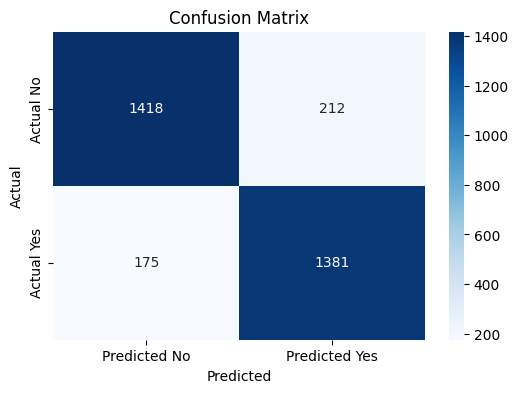

In [100]:

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


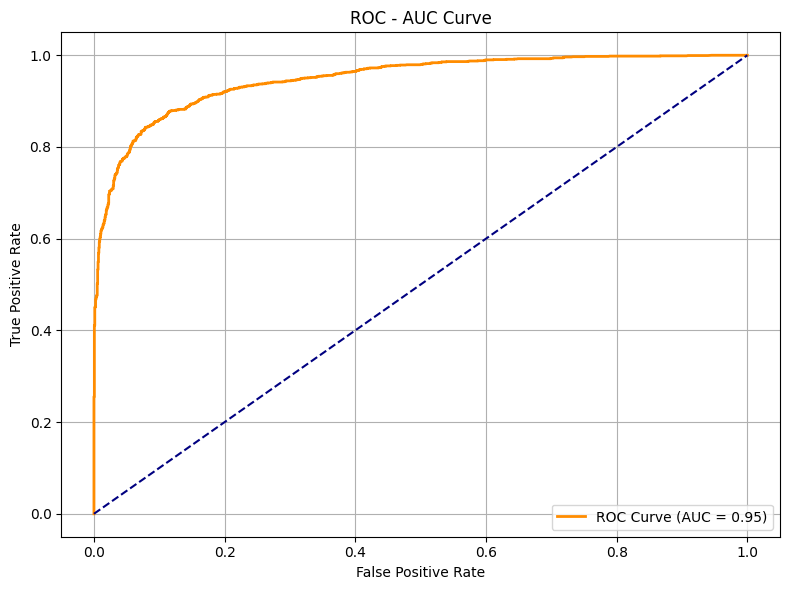

In [134]:
from sklearn.metrics import roc_curve, auc

y_probs = gridcv.predict_proba(X_test_scaler)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()


## Starting with research questions

## Q1.

Can we predict whether a customer will churn based on their service usage, tenure, and demographics?

In [101]:
selected_features = ['NumOfProducts', 'HasCrCard', 'IsActiveMember',
                     'Tenure',
                     'Gender', 'Age', 'Geography_France', 'Geography_Germany', 'Geography_Spain',
                     ]

In [102]:
X_selected = df[selected_features]
y = df['Churn']

In [103]:
X_selected_res,y_res=smote.fit_resample(X_selected,y)

In [104]:
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected_res, y_res, test_size=0.2, random_state=42, stratify=y_res)


In [105]:
X_train_sel=scaler.fit_transform(X_train_sel)

In [106]:
X_test_sel=scaler.transform(X_test_sel)

In [107]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_sel, y_train_sel)

y_pred_sel = rf.predict(X_test_sel)
print(classification_report(y_test_sel, y_pred_sel))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1593
           1       0.84      0.87      0.86      1593

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



This model predict churners and non-churners very equally well with good accuracy, further there is no major imbalance of one class over other.
High precision and recall indicate low false positive and low false negative

## Q2.

Which features contribute the most in predicting churn?

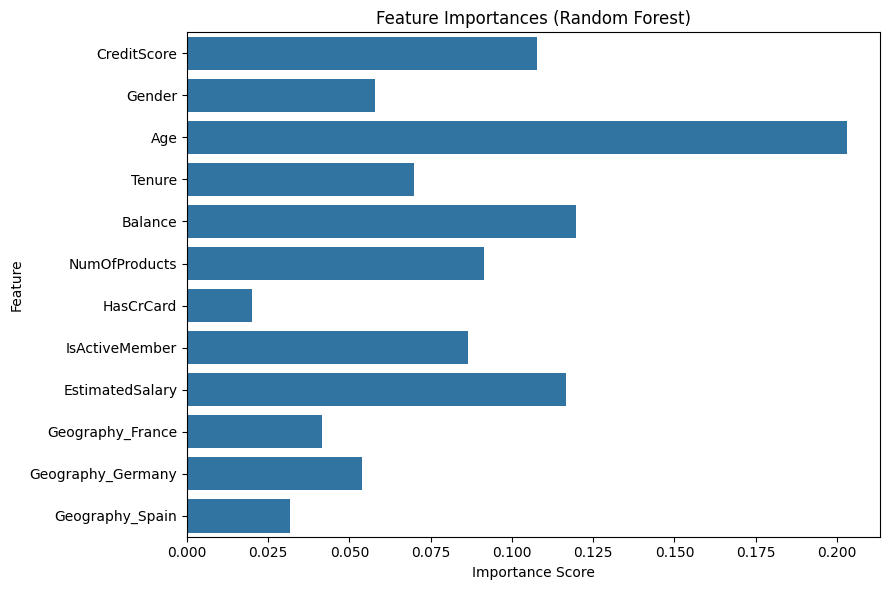

In [108]:
features = X_res.columns
importances = gridcv.best_estimator_.feature_importances_

plt.figure(figsize=(9, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()

The top contributors to predicting customer churn are Age, Balance, Estimated Salary, and IsActiveMember. These features show a strong relationship with churn behavior. 

## Q3.

Can the model detect at-risk customers early i.e. within the first 3 months)?

In [109]:
X_test_early_scaled = X_test_scaler[(X_test['Tenure']<=3)]
y_test_early = y_test[X_test['Tenure'] <= 3]


In [110]:
y_pred_early = grid.predict(X_test_early_scaled)

In [111]:
print(classification_report(y_test_early, y_pred_early))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       532
           1       0.84      0.84      0.84       583

    accuracy                           0.83      1115
   macro avg       0.83      0.83      0.83      1115
weighted avg       0.83      0.83      0.83      1115



In [112]:
confusion_matrix(y_test_early, y_pred_early)

array([[441,  91],
       [ 94, 489]])

Hence our model achieves 84% recall and 83% accuracy on early-stage customers, meaning it is highly capable for identifying at-risk customers early.

## Q4

Can we segment customers by churn risk probability to prioritize retention campaigns?

In [113]:
churn_probs = grid.predict_proba(X)[:, 1]

In [114]:
risk_df = df_og.copy()
risk_df['Churn_prob']=churn_probs
risk_df['Actual Churn']=y.values


In [115]:
def segment_risk(prob):
    if prob>0.7:
        return 'High Risk'
    elif prob>0.4 and prob<0.7:
        return 'Medium Risk'
    else:
        return 'Low Risk'

In [116]:
risk_df['Risk_Segment']=risk_df['Churn_prob'].apply(segment_risk)

In [117]:
risk_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Churn_prob,Actual Churn,Risk_Segment
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,0.0,1,Low Risk
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0,Low Risk
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1.0,1,High Risk
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,1.0,0,High Risk
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0,1.0,0,High Risk
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0,0.0,0,Low Risk
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1,0.0,1,Low Risk
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,1.0,1,High Risk


In [118]:
risk_df['Risk_Segment'].value_counts()

Risk_Segment
High Risk      6097
Medium Risk    1969
Low Risk       1934
Name: count, dtype: int64

In [119]:
high_risk_customers = risk_df[risk_df['Risk_Segment'] == 'High Risk']

In [120]:
high_risk_customers

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Churn_prob,Actual Churn,Risk_Segment
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1.000000,1,High Risk
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,1.000000,0,High Risk
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1,1.000000,1,High Risk
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1,1.000000,1,High Risk
10,528,France,1,31,6,102016.72,2,0,0,80181.12,0,1.000000,0,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,644,France,1,28,7,155060.41,1,1,0,29179.52,0,0.928571,0,High Risk
9994,800,France,0,29,2,0.00,2,0,0,167773.55,0,1.000000,0,High Risk
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0,1.000000,0,High Risk
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,1.000000,1,High Risk


Hence these are all the customers having higher risk to churn rather than others.

## Q5.

Can we predict churn differently for different customer segments, such as geography or senior citizens or acitivity status?

In [121]:
segment_df=X_test.copy()

In [122]:
segment_df['Age_Group'] = pd.cut(segment_df['Age'], 
                                 bins=[0, 30, 60, 100], 
                                 labels=['Young', 'Middle-aged', 'Senior'])

In [123]:
segment_df['Geography'] = segment_df[['Geography_France', 'Geography_Germany', 'Geography_Spain']].idxmax(axis=1).str.replace('Geography_','')


In [124]:
segment_df['Activity_Status'] = segment_df['IsActiveMember'].map({1: 'Active', 0: 'Inactive'})

In [125]:
segment_df['Churn_Actual']=y_test.values

In [126]:
segment_df['Churn_Pred']=gridcv.predict(X_test_scaler)

In [127]:
segment_df.drop(['Geography_France', 'Geography_Germany', 'Geography_Spain'], axis=1, inplace=True)


In [128]:
segment_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_Group,Geography,Activity_Status,Churn_Actual,Churn_Pred
809,657,0,37,6,95845.600000,1,1,0,122218.230000,Middle-aged,France,Inactive,0,0
10711,655,0,46,5,87294.558076,1,0,0,85699.838867,Middle-aged,Germany,Inactive,1,1
2592,505,1,40,6,47869.690000,2,1,1,155061.970000,Middle-aged,Germany,Active,0,0
2513,666,1,39,10,0.000000,2,1,0,102999.330000,Middle-aged,France,Inactive,0,0
8405,583,1,40,3,0.000000,2,1,0,47728.000000,Middle-aged,France,Inactive,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,613,1,37,9,108286.500000,1,1,1,114153.440000,Middle-aged,France,Active,0,0
5580,616,1,30,2,0.000000,2,1,0,199099.510000,Young,Spain,Inactive,0,0
7491,622,1,40,4,99799.760000,2,1,0,197372.130000,Middle-aged,France,Inactive,0,0
6867,656,0,32,1,104254.270000,1,1,1,17034.370000,Middle-aged,Spain,Active,0,0


Age Segment

In [129]:
print("---- Churn Prediction by Age Group ----")
for group in segment_df['Age_Group'].unique():
    print(f"\nSegment: {group}")
    subset = segment_df[segment_df['Age_Group'] == group]
    print(classification_report(subset['Churn_Actual'], subset['Churn_Pred']))


---- Churn Prediction by Age Group ----

Segment: Middle-aged
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1152
           1       0.89      0.88      0.88      1452

    accuracy                           0.87      2604
   macro avg       0.87      0.87      0.87      2604
weighted avg       0.87      0.87      0.87      2604


Segment: Senior
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        67
           1       0.86      0.94      0.90        64

    accuracy                           0.89       131
   macro avg       0.90      0.89      0.89       131
weighted avg       0.90      0.89      0.89       131


Segment: Young
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       374
           1       0.89      0.65      0.75        77

    accuracy                           0.93       451
   macro avg       0.91      0.82

Geography Segment

In [130]:
print("---- Churn Prediction by Geography ----")
for geo in segment_df['Geography'].unique():
    print(f"\nSegment: {geo}")
    subset = segment_df[segment_df['Geography'] == geo]
    print(classification_report(subset['Churn_Actual'], subset['Churn_Pred']))


---- Churn Prediction by Geography ----

Segment: France
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       846
           1       0.91      0.88      0.89       850

    accuracy                           0.90      1696
   macro avg       0.90      0.90      0.90      1696
weighted avg       0.90      0.90      0.90      1696


Segment: Germany
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       353
           1       0.87      0.90      0.88       596

    accuracy                           0.85       949
   macro avg       0.84      0.83      0.84       949
weighted avg       0.85      0.85      0.85       949


Segment: Spain
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       394
           1       0.82      0.70      0.75       147

    accuracy                           0.88       541
   macro avg       0.86      0.82    

Activity Status Segment

In [131]:
print("---- Churn Prediction by Activity Status ----")
for status in ['Active', 'Inactive']:
    print(f"\nSegment: {status}")
    subset = segment_df[segment_df['Activity_Status'] == status]
    print(classification_report(subset['Churn_Actual'], subset['Churn_Pred']))


---- Churn Prediction by Activity Status ----

Segment: Active
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       891
           1       0.78      0.60      0.68       292

    accuracy                           0.86      1183
   macro avg       0.83      0.77      0.80      1183
weighted avg       0.86      0.86      0.85      1183


Segment: Inactive
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       702
           1       0.90      0.93      0.92      1301

    accuracy                           0.89      2003
   macro avg       0.88      0.87      0.88      2003
weighted avg       0.89      0.89      0.89      2003



The model performed well across all customer segments like geography, senior citizen status, and activity level. This shows it can predict churn accurately for different types of customers without any major bias.